# _**Employee Attrition**_ #

1. Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

2. EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     1341 non-null   int64 
 1   age_years              1341 non-null   int64 
 2   travel_freq            1341 non-null   object
 3   daily_salary           1341 non-null   int64 
 4   work_division          1341 non-null   object
 5   commute_distance       1341 non-null   int64 
 6   education_level        1341 non-null   int64 
 7   degree_field           1341 non-null   object
 8   headcount              1341 non-null   int64 
 9   env_satisfaction       1341 non-null   int64 
 10  sex                    1341 non-null   object
 11  hourly_wage            1341 non-null   int64 
 12  job_engagement         1341 non-null   int64 
 13  position_level         1341 non-null   int64 
 14  job_title              1341 non-null   object
 15  job_satisfaction     

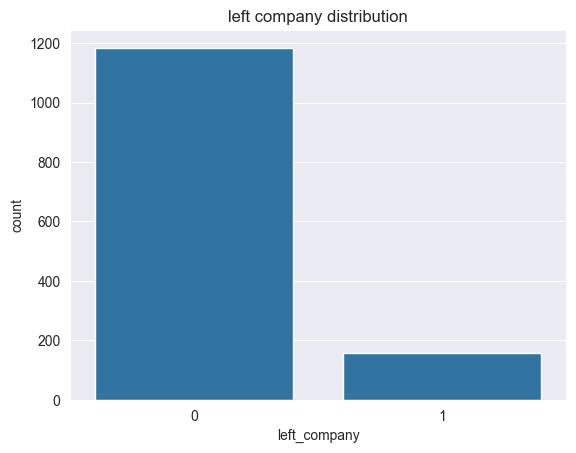

In [31]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')


print(train.info())
print(train['left_company'].value_counts())


train.fillna(train.median(numeric_only=True),inplace=True)

label_cols = ['travel_freq', 'work_division', 'degree_field', 'sex', 'job_title', 'marital_state', 'is_adult', 'overtime_status']

train = pd.get_dummies(train, columns=label_cols, drop_first=True)
test = pd.get_dummies(test, columns=label_cols, drop_first=True)


test = test.reindex(columns = train.drop(columns=['left_company']).columns, fill_value=0)


sns.countplot(x='left_company', data=train)
plt.title('left company distribution')
plt.show()

3. Baseline Model: Logistic Regression

f1: 0.34146341463414637
recall: 0.2413793103448276
precision: 0.5833333333333334
roc_auc: 0.8547413793103449


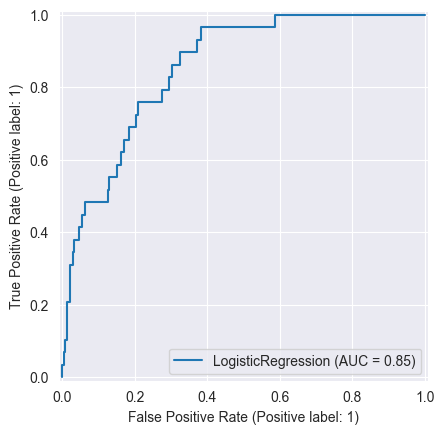

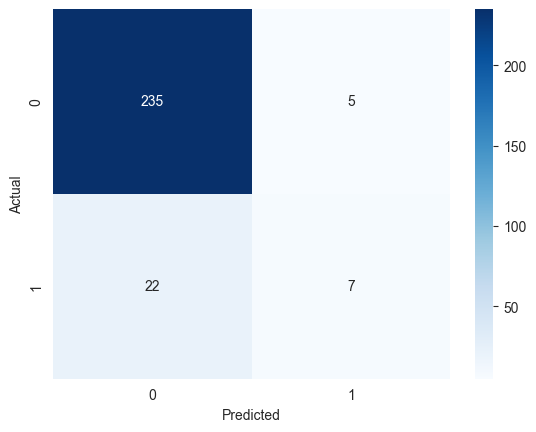

In [33]:
x = train.drop(['ID','left_company'], axis=1)
y = train['left_company']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'f1: {f1_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')
print(f'roc_auc: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}')


RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

4: Advanced Models and Balance Data

In [34]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(X_train, y_train)

4.1: SVM(Kernel : Linear)

SVM(Linear)
f1 : 0.42
recall: 0.7241379310344828
precision: 0.29577464788732394
roc_auc: 0.8222701149425287


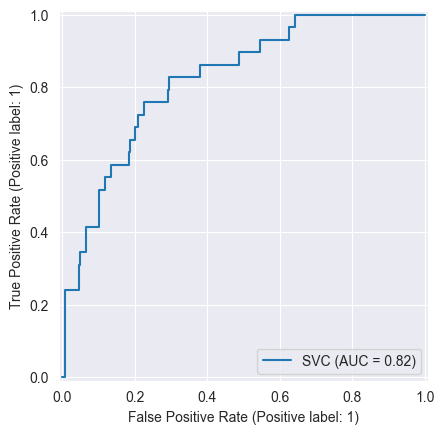

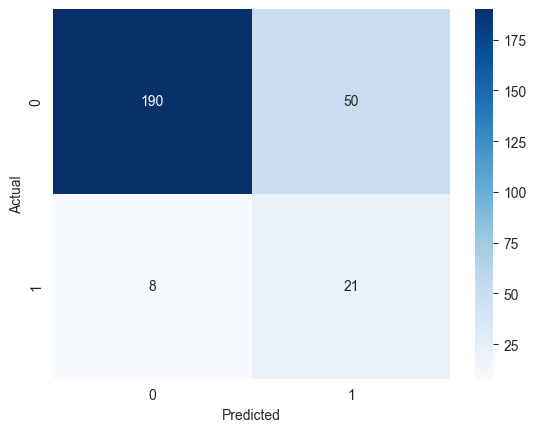

In [35]:
svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(x_resampled, y_resampled)
y_pred = svm_linear.predict(X_test)

print('SVM(Linear)')
print(f'f1 : {f1_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')
print(f'roc_auc: {roc_auc_score(y_test, svm_linear.predict_proba(X_test)[:, 1])}')


RocCurveDisplay.from_estimator(svm_linear, X_test, y_test)
plt.show()


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

4.2: SVM(Kernel : RBF)

SVM(RBF)
f1 : 0.42857142857142855
recall: 0.41379310344827586
precision: 0.4444444444444444
roc_auc: 0.7725574712643679


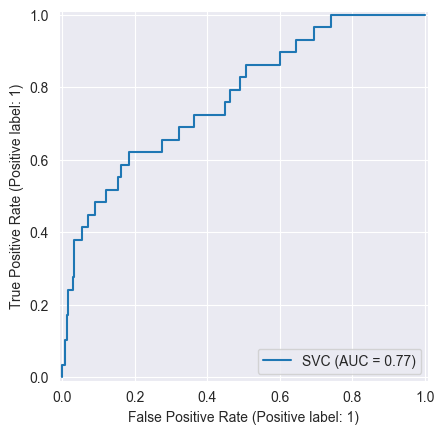

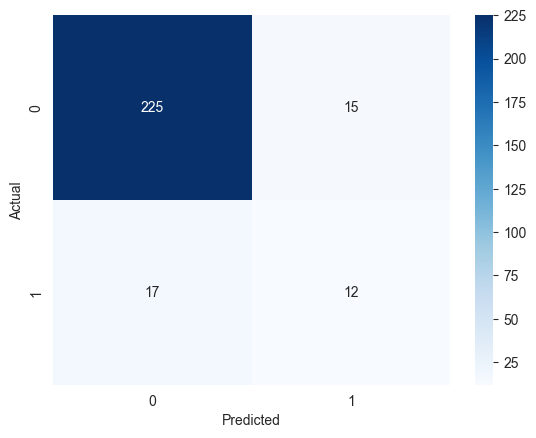

In [36]:
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(x_resampled, y_resampled)
y_pred = svm_rbf.predict(X_test)

print('SVM(RBF)')
print(f'f1 : {f1_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')
print(f'roc_auc: {roc_auc_score(y_test, svm_rbf.predict_proba(X_test)[:, 1])}')


RocCurveDisplay.from_estimator(svm_rbf, X_test, y_test)
plt.show()


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

4.3: XGBoost

C:\Users\victus\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:24:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "seval_metric" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost
f1: 0.4444444444444444
recall: 0.3448275862068966
precision: 0.625
roc_auc: 0.8461206896551724


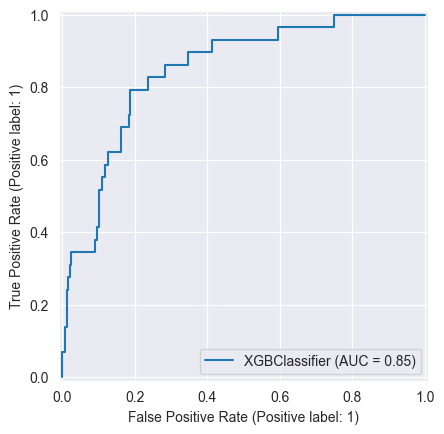

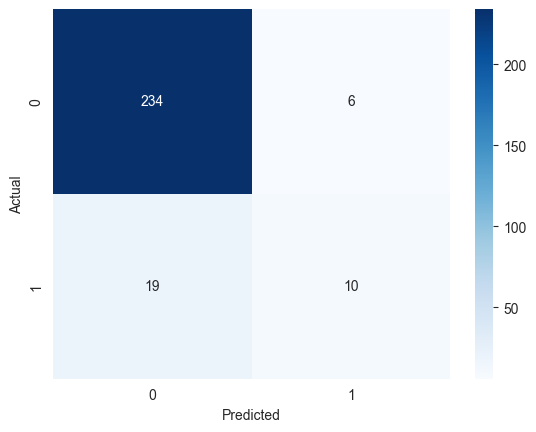

In [37]:
xgb = XGBClassifier(seval_metric='logloss')
xgb.fit(x_resampled, y_resampled)
y_pred = xgb.predict(X_test)

print('XGBoost')
print(f'f1: {f1_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')
print(f'roc_auc: {roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])}')


RocCurveDisplay.from_estimator(xgb, X_test, y_test)
plt.show()


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

4.4: K-Nearest Neighbors

K-Nearest Neighbors
f1: 0.2956521739130435
recall: 0.5862068965517241
precision: 0.19767441860465115
ruc_auc: 0.7163074712643678


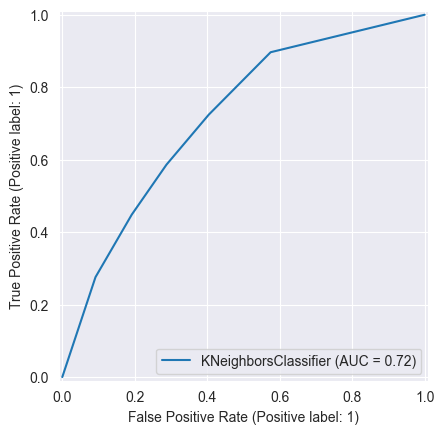

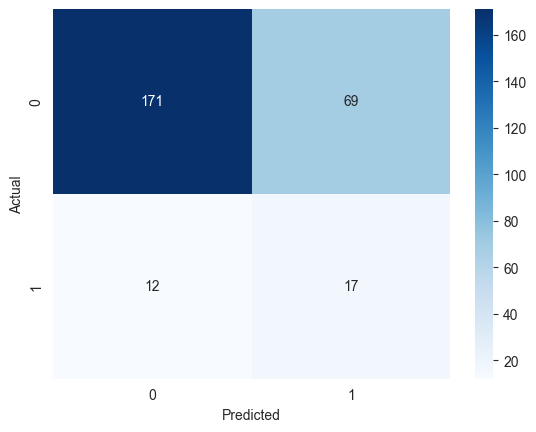

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_resampled, y_resampled)
y_pred = knn.predict(X_test)

print('K-Nearest Neighbors')
print(f'f1: {f1_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')
print(f'ruc_auc: {roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])}')


RocCurveDisplay.from_estimator(knn, X_test, y_test)
plt.show()


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

5. Handeling Imbalanced Data

f1: 0.4329896907216495
recall: 0.7241379310344828
precision: 0.3088235294117647
roc_auc: 0.8300287356321838


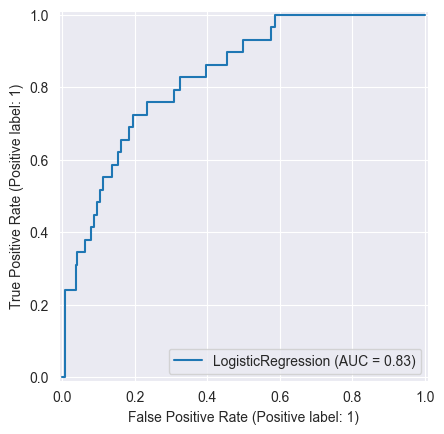

In [40]:
model_smote =  LogisticRegression(max_iter=1000)
model_smote.fit(x_resampled, y_resampled)
smote_pred = model_smote.predict(X_test)

print(f'f1: {f1_score(y_test, smote_pred)}')
print(f'recall: {recall_score(y_test, smote_pred)}')
print(f'precision: {precision_score(y_test, smote_pred)}')
print(f'roc_auc: {roc_auc_score(y_test, model_smote.predict_proba(X_test)[:, 1])}')

RocCurveDisplay.from_estimator(model_smote, X_test, y_test)
plt.show()